In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.constants import c

from tracking import *

In [2]:
tck = np.load('ranging_qo100_20200614_1156.npz')
#tck = np.load('ranging_qo100_20200614_1248.npz')

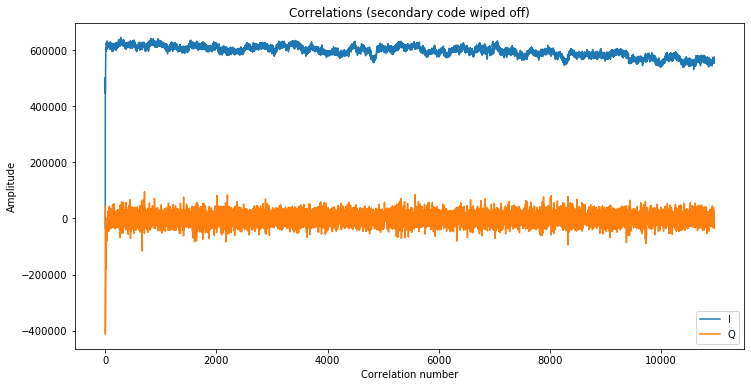

In [3]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(tck['correlations'].real)
plt.plot(tck['correlations'].imag)
plt.title('Correlations (secondary code wiped off)')
plt.ylabel('Amplitude')
plt.xlabel('Correlation number')
plt.legend(['I', 'Q']);

In [4]:
t = np.arange(tck['freq'].size) * 1e-3

Text(0.5, 0, 'Time (s)')

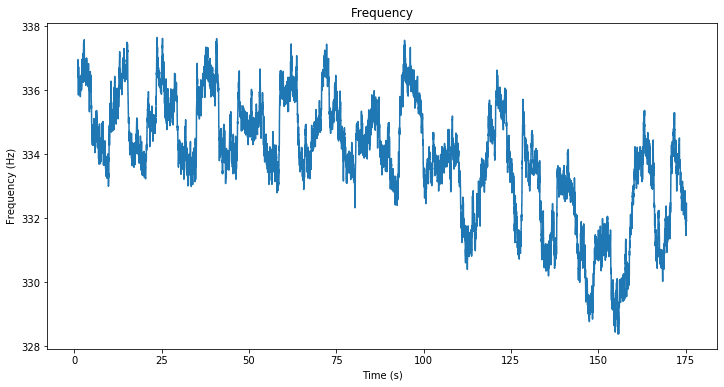

In [5]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t[1000:], tck['freq'][1000:])
plt.title('Frequency')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

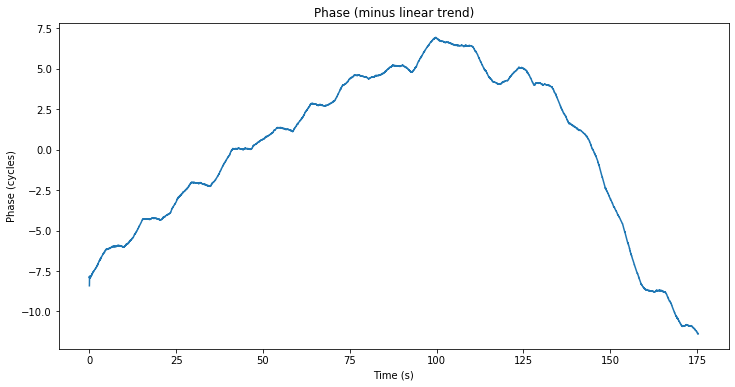

In [6]:
plt.figure(figsize = (12,6), facecolor = 'w')
sel = ~np.isnan(tck['phase'])
plt.plot(t[sel], scipy.signal.detrend(tck['phase'][sel])/(2*np.pi))
plt.title('Phase (minus linear trend)')
plt.ylabel('Phase (cycles)')
plt.xlabel('Time (s)')

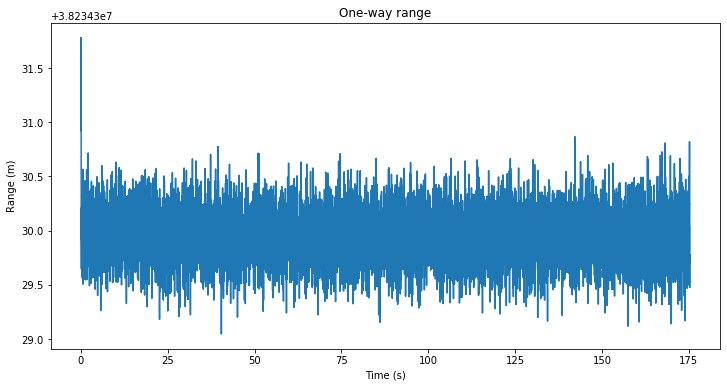

In [7]:
t0 = (t - (tck['symbol'] * prn.size + tck['code_delay'])/fc) % t_ambiguity
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t, t0 * c / 2)
plt.title('One-way range')
plt.ylabel('Range (m)')
plt.xlabel('Time (s)');

In [8]:
t00 = np.average(t0[500:])
t00 * c / 2

38234329.94786957